In [80]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (14., 7.)})
sns.set_style('whitegrid')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\34603\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\34603\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
new_df_tp = pd.read_csv('twin_peaks_df.csv')
new_df_tp.sample()

,name,text,episode,season
1425,ALBERT,Sounds like you've been snacking on some of th...,4,1


In [82]:
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]

    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]   

In [83]:
new_df_tp['tokenized'] = new_df_tp.apply(lambda x: tokenize(x['text']), axis=1)
new_df_tp[['name', 'tokenized']].head()

,name,tokenized
0,LOG LADY,"[Welcome, to, Twin, Peaks, My, name, is, Marga..."
1,PETE,"[Gone, raps, his, knuckles, on, the, counter, ..."
2,PETE,"[A, lonesome, foghorn, stops, walking, turns, ..."
3,PETE,"[Oh, dear, Lucy, Lucy, this, is, Pete, Martell..."
4,LUCY,"[Sheriff, its, Pete, Martell, up, at, the, mil..."


In [84]:
def remove_stopwords(tokenized_column):
    """Return a list of tokens with English stopwords removed. 

    Args:
        column: Pandas dataframe column of tokenized data from tokenize()

    Returns:
        tokens (list): Tokenized list with stopwords removed.

    """
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]

In [85]:
new_df_tp['stopwords_removed'] = new_df_tp.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
new_df_tp[['name', 'stopwords_removed']].head()

,name,stopwords_removed
0,LOG LADY,"[Welcome, Twin, Peaks, My, name, Margaret, Lan..."
1,PETE,"[Gone, raps, knuckles, counter, walks, TO, INT..."
2,PETE,"[A, lonesome, foghorn, stops, walking, turns, ..."
3,PETE,"[Oh, dear, Lucy, Lucy, Pete, Martell, Lucy, pu..."
4,LUCY,"[Sheriff, Pete, Martell, mill, I, going, trans..."


In [86]:
def apply_stemming(tokenized_column):
    """Return a list of tokens with Porter stemming applied.

    Args:
        column: Pandas dataframe column of tokenized data with stopwords removed.

    Returns:
        tokens (list): Tokenized list with words Porter stemmed.

    """

    stemmer = PorterStemmer() 
    return [stemmer.stem(word) for word in tokenized_column]

In [87]:
new_df_tp['porter_stemmed'] = new_df_tp.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
new_df_tp[['name', 'porter_stemmed']].head()

,name,porter_stemmed
0,LOG LADY,"[welcom, twin, peak, my, name, margaret, lante..."
1,PETE,"[gone, rap, knuckl, counter, walk, to, int, bl..."
2,PETE,"[a, lonesom, foghorn, stop, walk, turn, look, ..."
3,PETE,"[oh, dear, luci, luci, pete, martel, luci, put..."
4,LUCY,"[sheriff, pete, martel, mill, i, go, transfer,..."


In [88]:
def rejoin_words(tokenized_column):
    """Rejoins a tokenized word list into a single string. 
    
    Args:
        tokenized_column (list): Tokenized column of words. 
        
    Returns:
        string: Single string of untokenized words. 
    """
    
    return ( " ".join(tokenized_column))

In [89]:
new_df_tp['rejoined'] = new_df_tp.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
new_df_tp[['name', 'rejoined']].head()


,name,rejoined
0,LOG LADY,welcom twin peak my name margaret lantermen i ...
1,PETE,gone rap knuckl counter walk to int blue pine ...
2,PETE,a lonesom foghorn stop walk turn look onto lak...
3,PETE,oh dear luci luci pete martel luci put harri t...
4,LUCY,sheriff pete martel mill i go transfer phone t...


In [90]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\34603\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [76]:
sia = SentimentIntensityAnalyzer()

In [77]:
sia.polarity_scores(col_list)

AttributeError: 'list' object has no attribute 'encode'

In [91]:
col_list = new_df_tp["rejoined"].values.tolist()


In [92]:
def sa (x):
    try:
        return sia.polarity_scores(x)['compound']
    except:
        return x

In [93]:
new_df_tp.sample()

,name,text,episode,season,tokenized,stopwords_removed,porter_stemmed,rejoined
15,SHERIFF TRUMAN,"Andy, pictures.",1,1,"[Andy, pictures]","[Andy, pictures]","[andi, pictur]",andi pictur


In [94]:
new_df_tp["sentiment"] = new_df_tp["rejoined"].apply(sa)

In [98]:
df_2 = new_df_tp.groupby("name")["sentiment"].mean()

In [99]:
df_2

name
ALBERT       -0.011955
ALICE        -0.084389
ANDY          0.007475
ANNOUNCER     0.375586
AUDREY        0.158453
                ...   
SYLVIA       -0.054137
TELEVISION    0.434429
TERRY         0.000000
TRUDY         0.088080
WALDO        -0.691325
Name: sentiment, Length: 102, dtype: float64

In [58]:
df_1 = df_2.reset_index() 

In [44]:
df_1["name"].unique()

array(['ALBERT', 'ALICE', 'ANDY', 'ANNOUNCER', 'AUDREY', 'BARTENDER',
       'BEAUTIFUL WOMAN', 'BENJAMIN', 'BERNARD', 'BETTY', 'BIG ED',
       'BLACKIE', 'BOB', 'BOBBY', 'CATHERINE', 'CHET', 'CONCIERGE',
       'COOPER', 'COUPLE I', 'COUPLE II', 'COWORKER', 'CUSTOMER', 'DONNA',
       'EILEEN', 'ELECTRONIC NOTEBOOK', 'EMERALD', 'EMORY', 'ENGINEER',
       'EVERYONE', 'FEMALE SINGER', 'FLESHWORLD MAGAZINE', 'FRED',
       'FRIEND', 'GARY', 'GILMAN', 'GORDON', 'GROUP', 'HANK', 'HARRIET',
       'HAWK', 'HEBA', 'HEIDI', 'HOSTESS', 'INSURANCE DOCUMENT',
       'INTERCOM', 'JACQUES', 'JADE', 'JAMES', 'JANEK', 'JARED', 'JENNY',
       'JERRY', 'JOEY', 'JOHNNY', 'JOSIE', 'JULIE', 'LAURA', 'LELAND',
       'LEO', 'LITTLE MAN', 'LOG LADY', 'LUCY', 'MADELEINE',
       'MAJOR BRIGGS', 'MARGARET', 'MARTHA', 'MAX', 'MAYOR', 'MIKE',
       'MILL WORKER', 'MONTANA', 'MOONIE', 'NADINE', 'NORMA', 'NOTE',
       'NURSE', 'OFFICER', 'OLD LADY', 'PETE', 'PHONE', 'PHOTOGRAPH',
       'PHOTOGRAPHS', 'POKE

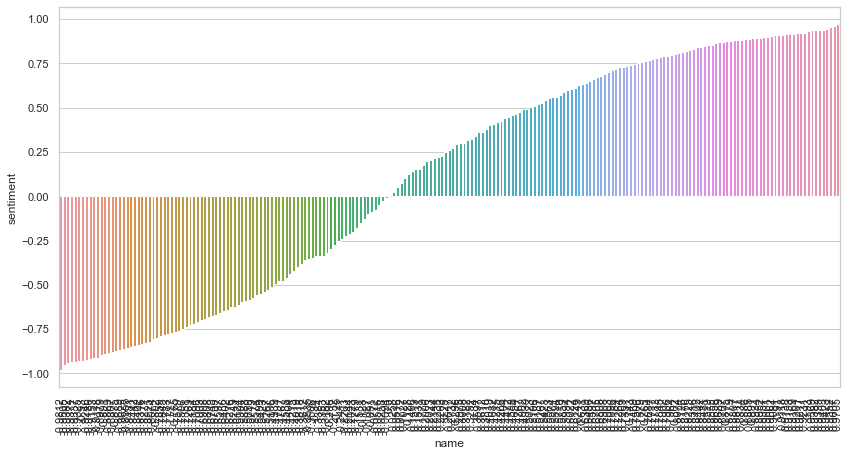

In [78]:
ax = sns.barplot(data=df_2, x=df_2.index, y="sentiment")
ax.tick_params(axis='x', rotation=90)


In [46]:
fig = px.bar(df_2, x=df_2.index, y="sentiment")
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['episode', 'season'] but received: sentiment